# Regression Analysis

- A method for investigating functional relationship among variables
    - Example:
        - Predicting sales price of a home selected physical characteristics of the building and taxes (local, school, county) paid on the building.
        - Predicting cigarette consumption as a function of various socioeconomic and demographic variables such as age, education, income, and price of cigarettes.
- Relationship is expressed in the form of an equation or a model connecting the response or dependent variable and one or more explanatory or predictor variables.
- We denote the response variable by $Y$ and the set of predictor variables by $X_l, X_2 , \ldots , X_p$ , where $p$ denotes the number of predictor variables.
- The true relationship between $Y$ and $X_l, X_2 , \ldots , X_p$ can be approximated by the regression model:

\\[ Y = F(X_l, X_2 , \ldots , X_p) \\]

- If we assume that the function $f$ is a linear function:

\\[ Y = \beta_0 + \beta_1 X_l + \beta_2 X_2 , \ldots , \beta_p X_p\\]

- $\beta$’s are called the regression parameters or **coefficients**, are unknown constants to be determined (estimated) from the data.
- The predictor or explanatory variables are also called by other names such as **independent variables, covariates, regressors, factors, and carries**.

## Regression Example: Advertising Dataset

- Advertising data set consists of the sales of that product in 200 different markets, along with advertising budgets for the product in each of those markets for three different media: **TV, radio, and newspaper**.
- You can find the dataset in regression folder or get it from http://www-bcf.usc.edu/~gareth/ISL/data.html
- Our goal is to increase sales by adjusting the budget spent on the advertising venues.
- Therefore, we need to develop a model that can be used to predict sales on the basis three media budgets.
- In this setting, the advertising budgets are features (a.k.a. our $X_i$ values) while sales is a label or outcome ($Y$).

In [34]:
import pandas as pd
import numpy as np

data = pd.read_csv("Advertising.csv", index_col = 0)

# Unnamed: 0

data.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


### Simple Linear Regression
- Simple linear regression is a model in which we use only **single predictor** and **assume a linear relation** between the predictor and the output variables. Hence our function becomes: 

$ Y = \beta_0 + \beta_1 X_l$

- We need to estimate $\beta_0$ and $\beta_1$, in order to use this model for prediction. 

Let's build a simple regression model that predicts **Sales** from **TV Budget** only:
- First, let's visually inspect the relation between two information:

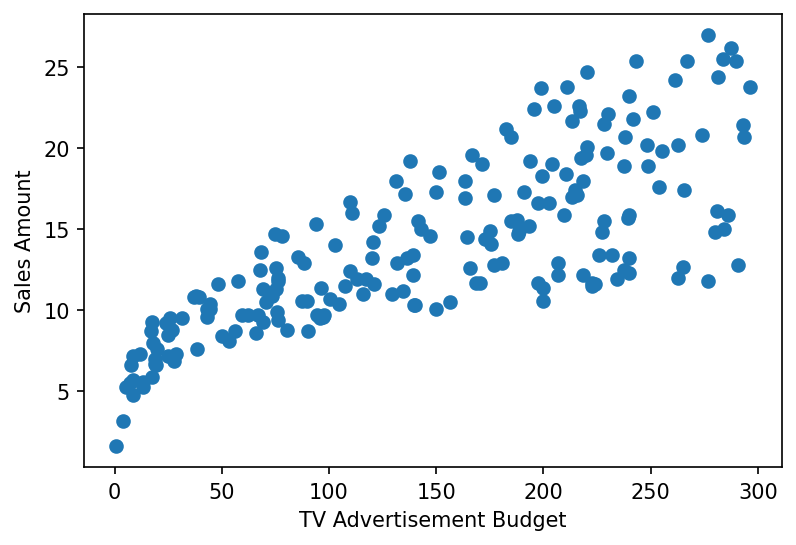

In [12]:
import matplotlib.pyplot as plt

plt.figure(dpi=150)
plt.scatter(data["TV"], data["Sales"])
plt.xlabel("TV Advertisement Budget")
plt.ylabel("Sales Amount")
plt.show()

#pozitif bir korelasyon var, bunu linear düşünebiliriz 

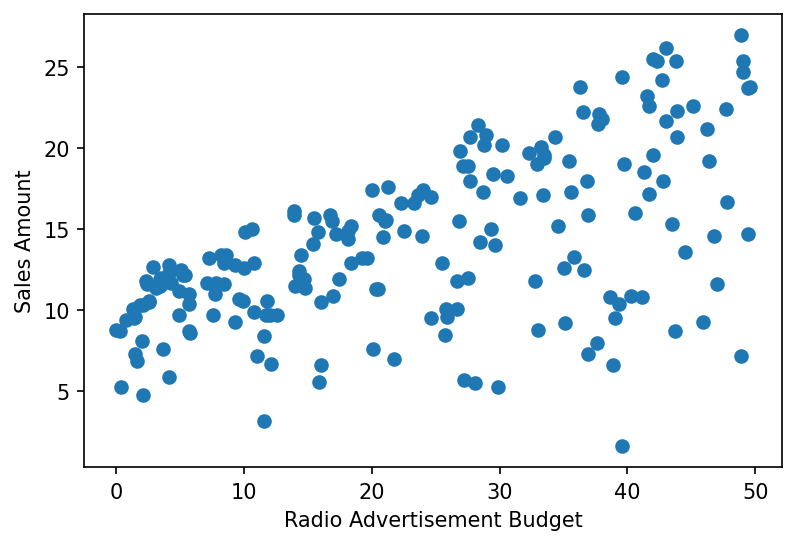

In [13]:
import matplotlib.pyplot as plt

plt.figure(dpi=150)
plt.scatter(data["Radio"], data["Sales"])
plt.xlabel("Radio Advertisement Budget")
plt.ylabel("Sales Amount")
plt.show()

In [35]:
# Let's train our simple linear regression model:

from sklearn.linear_model import LinearRegression
#create a predictor object
lr = LinearRegression() 

#get the data in right format
features = ["TV"]
x = data[features]
y = data["Sales"]

#fit the model. 
model = lr.fit(x,y) 
print("The coefficient is:", *model.coef_)
print("The intercept is:" , model.intercept_)

The coefficient is: 0.047536640433019764
The intercept is: 7.032593549127693


In [36]:
model

LinearRegression()

### Interpreting the results: 
- The coefficient list (*coef_*) includes the coefficients ($\beta_i$) of the independent variables ($X_i$). In this particular case 0.047536640433019764 is the coefficient of the TV Budget. **A positive value indicating that as TV budget increases so does the sales**
- The intecept (*intercept_*) is $\beta_0$
- Hence our final prediciting function becomes: 

\\[ Y = 7.032593549127693 + 0.047536640433019764 \times TV \\]

If we are given a new TV budget, we can predict the sales amount by using ``` predict()``` function:

In [38]:
# if TV budget is 50, 150, 250 
new_budgets = np.array([50, 150, 250])
new_budgets = new_budgets.reshape(-1, 1) 
prediction = model.predict(new_budgets)

print("Estimated Sales for 50:", prediction[0])
print("Estimated Sales for 150:", prediction[1])
print("Estimated Sales for 250:", prediction[2])

Estimated Sales for 50: 9.409425570778682
Estimated Sales for 150: 14.163089614080658
Estimated Sales for 250: 18.916753657382635


In [8]:
new_budgets.shape

(3, 1)

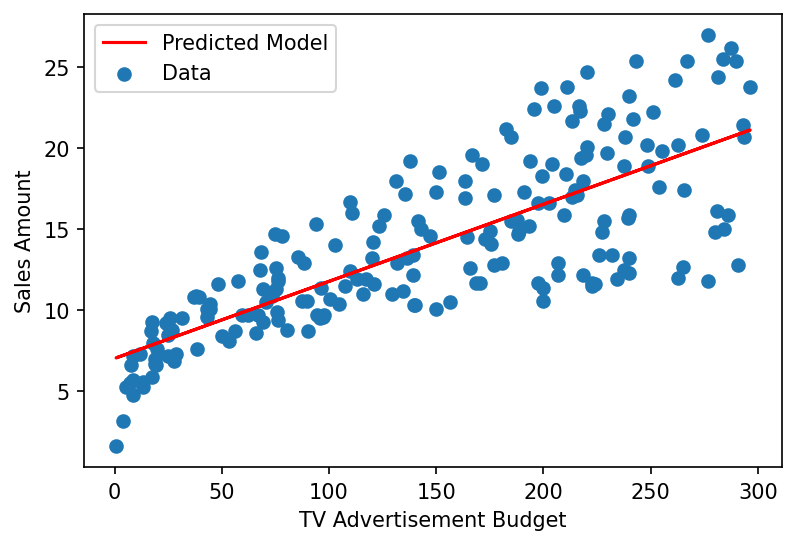

In [17]:
# get the estimated values and add them to the plot:
y_predicted = model.predict(x)

plt.figure(dpi=150)
plt.scatter(data["TV"], data["Sales"])
plt.plot(x, y_predicted, color="r" )

plt.xlabel("TV Advertisement Budget")
plt.ylabel("Sales Amount")
plt.legend(["Predicted Model", "Data"])
plt.show() 

### Estimating the coefficients 

- In order to find the best fitting function (or model), we want to **minimize the distance** between the actual target values ($y$'s) and predicted values ($\hat{y}$) for all data points  
- For each data point, this quantity is called the **residual** ($e_i$)

\\[e_i = y_i - \hat{y_i}\\]

![residual](./residual.PNG)

- We select the $\beta_i$'s that minimizes the following term which is called **Residual Sum of Squares (RSS)**:

\\[ RSS = e_0 + e_1 + e_2 + \ldots +e_p\\]

### Scoring a regression model
- One of the most commonly used scoring method is the use of $R^2$ measure. $R^2$ is calculated as follows:

\\[ R^2 = 1 - \frac{RSS}{SS_{tot}}\\] where $SS_{tot}$ is the variance within the data  

- $R^2$ will give us a value between 0 and 1. 1 indicating a perfect fit. The higher the $R^2$ value, the better the performance. 

In [21]:
# back to linear model: 

lr = LinearRegression() 

#get the data in right format
features = ["TV"]
x = data[features]
y = data["Sales"]

#fit the model. 
model = lr.fit(x,y)

#R2 is the default scoring method for linear regression
r2 = model.score(x,y) 

print("R2 Score is ", r2)

R2 Score is  0.611875050850071


### Multi-Linear Regression Models

- Only difference is, now we use multiple predictors to predict the target. 

- We fit a surface instead of a line

![multiple_regression](./multiple_regression.PNG)

- Let's include Radio and Newspaper into our model as well.

In [23]:
lr = LinearRegression() 

#get the data in right format
features = ["TV", "Radio" , "Newspaper"]
x = data[features]
y = data["Sales"]

#fit the model. 
model = lr.fit(x,y)

#R2 is the default scoring method for linear regression
r2 = model.score(x,y)

print("R2 Score is ", r2)

R2 Score is  0.8972106381789522


### Intoduction to Cross Validation
- Judging the performance of the model using the training data is often misleading
    - Model may memorize the data and perform well on training data but this leads to overfitting and hence poor performance on newly acquired data
- In order to assess the performance of the model, we need to set a part of the data aside for testing. This selection is done randomly 
- We train with majority of the data and test the performance on the test data
- In simplest form, this is called **cross-validation**.
- We can use ```sklearn.model_selection.train_test_split()``` function

In [40]:
from sklearn.model_selection import train_test_split
lr = LinearRegression() 

#get the data in right format
features = ["TV", "Radio" , "Newspaper"]
x = data[features]
y = data["Sales"]

#split the data train and test. 25% of the data is set aside as test data
x_train, x_test, y_train, y_test = train_test_split(x , y , test_size = 0.25, random_state=10)

#fit the model with train data. 
model = lr.fit(x_train,y_train)

#R2 is the default scoring method for linear regression
r2_train = model.score(x_train,y_train)
r2_test = model.score(x_test,y_test)

print("R2 Score for train data is ", r2_train)
print("R2 Score for test data is ", r2_test)
model.coef_

R2 Score for train data is  0.9238935852366272
R2 Score for test data is  0.836684397405523


array([ 0.04282674,  0.19498398, -0.00328677])